In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats



In [2]:
df = pd.read_csv("karur.csv")
pd.set_option("display.max_columns", None)
df

,YEAR,MO,DY,HR,T2M,RH2M,PRECTOTCORR,PS,WS50M
0,2011,6,1,5,24.83,91.44,0.00,98.06,5.44
1,2011,6,1,6,25.84,86.06,0.00,98.12,4.52
2,2011,6,1,7,27.45,76.56,0.10,98.18,5.46
3,2011,6,1,8,29.33,65.25,0.08,98.21,6.06
4,2011,6,1,9,30.95,56.75,0.31,98.22,6.23
...,...,...,...,...,...,...,...,...,...
86203,2021,4,1,0,28.07,67.56,0.00,98.07,4.03
86204,2021,4,1,1,27.72,70.88,0.00,98.01,4.28
86205,2021,4,1,2,27.37,74.31,0.00,97.98,4.16
86206,2021,4,1,3,27.06,77.06,0.00,97.99,4.08


In [3]:
numerical_feature = [
    feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(
    df[feature].unique()) < 32]
continuous_feature = [
    feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [
    feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete feature Count {}".format(len(discrete_feature)))
print("Continuous feature Count {}".format(len(continuous_feature)))
print("Categorical feature Count {}".format(len(categorical_feature)))


Numerical Features Count 9
Discrete feature Count 4
Continuous feature Count 5
Categorical feature Count 0


In [4]:
# Handle Missing Values
df.isnull().sum()*100/len(df)



YEAR           0.0
MO             0.0
DY             0.0
HR             0.0
T2M            0.0
RH2M           0.0
PRECTOTCORR    0.0
PS             0.0
WS50M          0.0
dtype: float64

In [5]:
print(numerical_feature)


['YEAR', 'MO', 'DY', 'HR', 'T2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS50M']


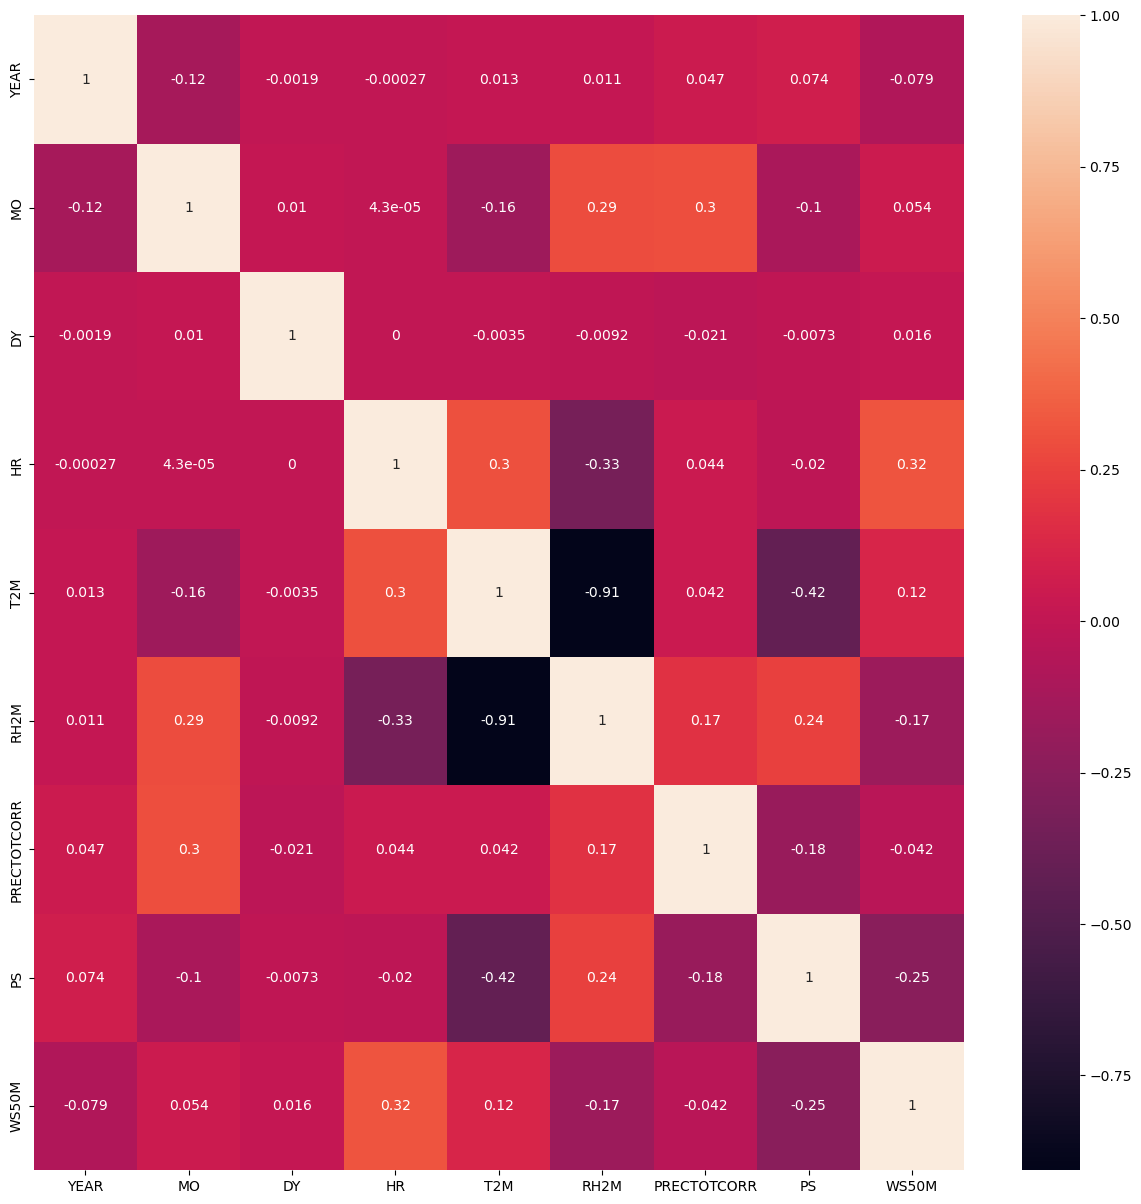

In [6]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [7]:
data=df.copy()

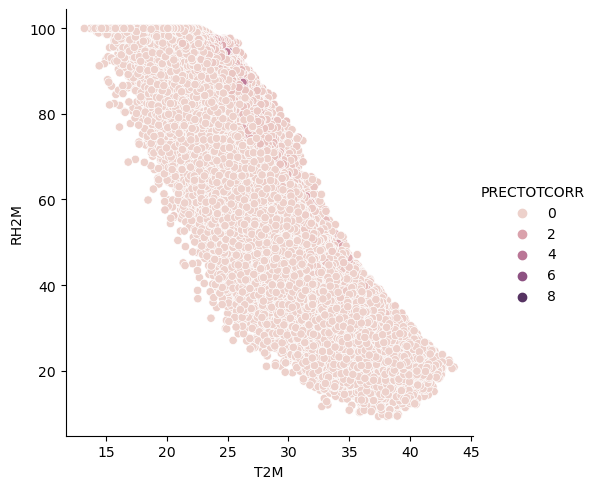

In [8]:
sns.relplot(x='T2M', y='RH2M', hue='PRECTOTCORR', data=data)
#QV :Humedity


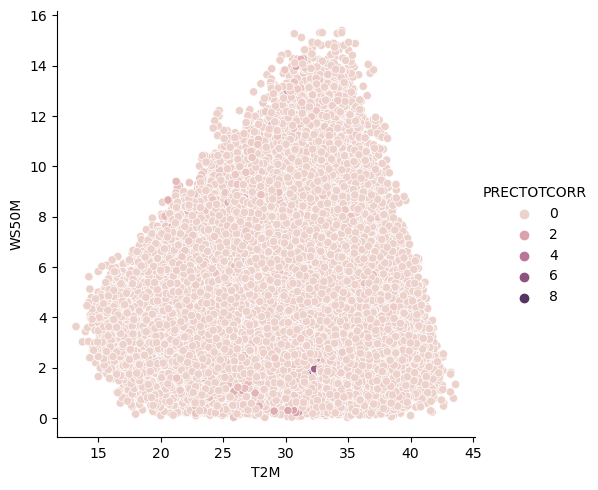

In [9]:
sns.relplot(x='T2M',y='WS50M',hue='PRECTOTCORR',data=data)

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


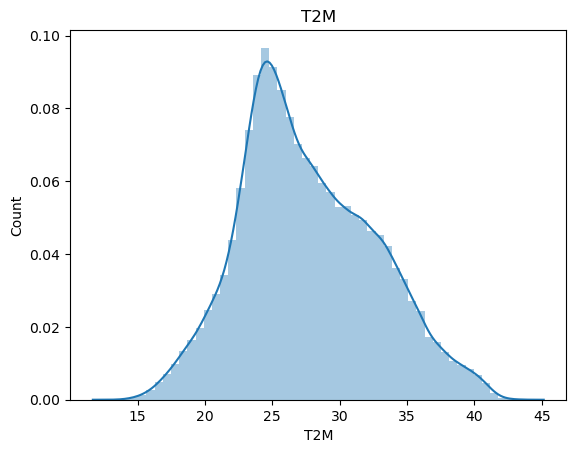

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


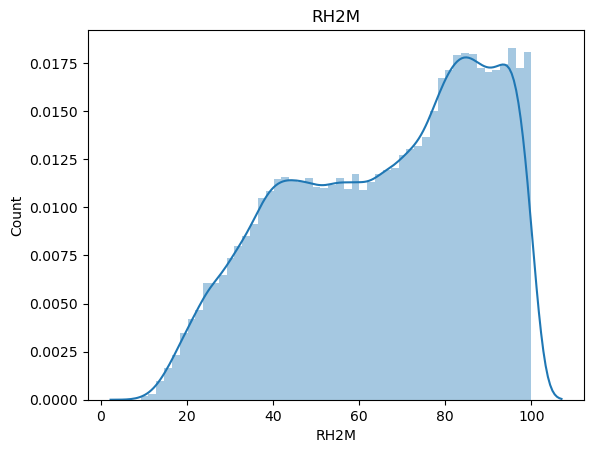

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


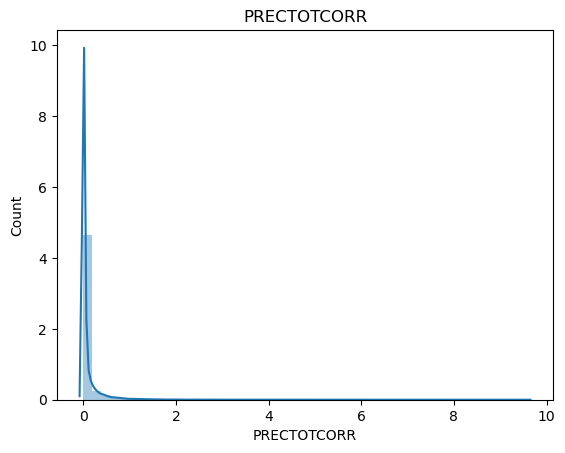

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


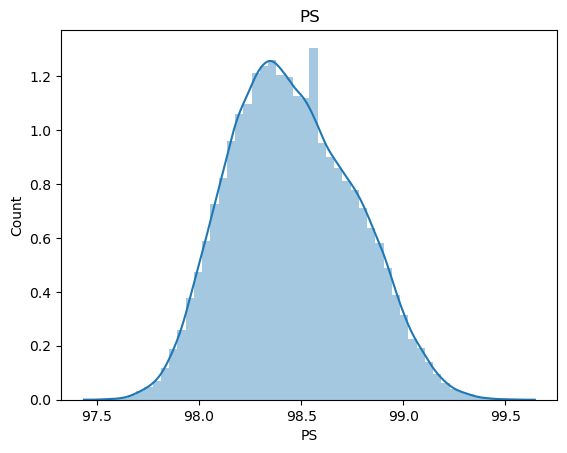

<Figure size 1500x1500 with 0 Axes>

/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


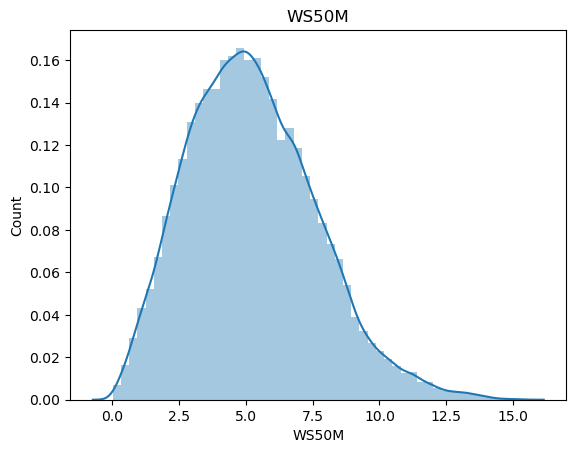

<Figure size 1500x1500 with 0 Axes>

In [10]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15, 15))
    plt.show()


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

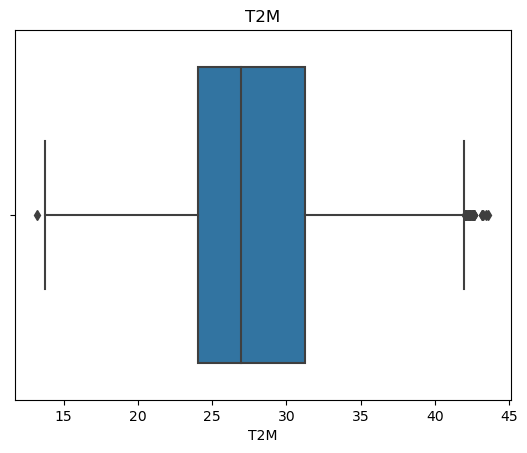

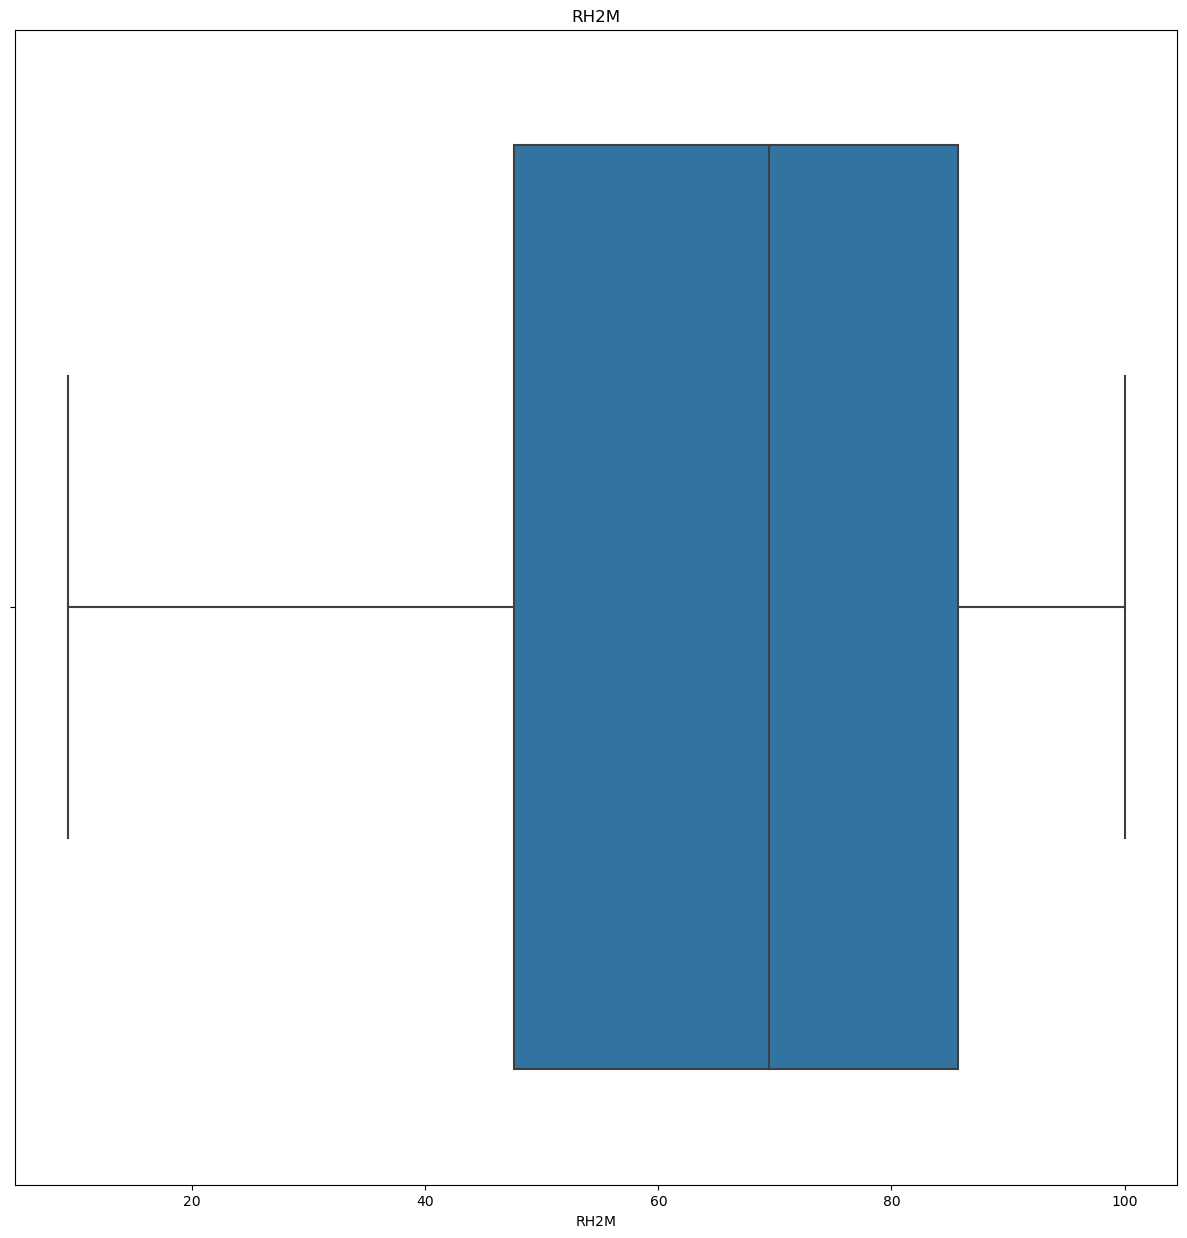

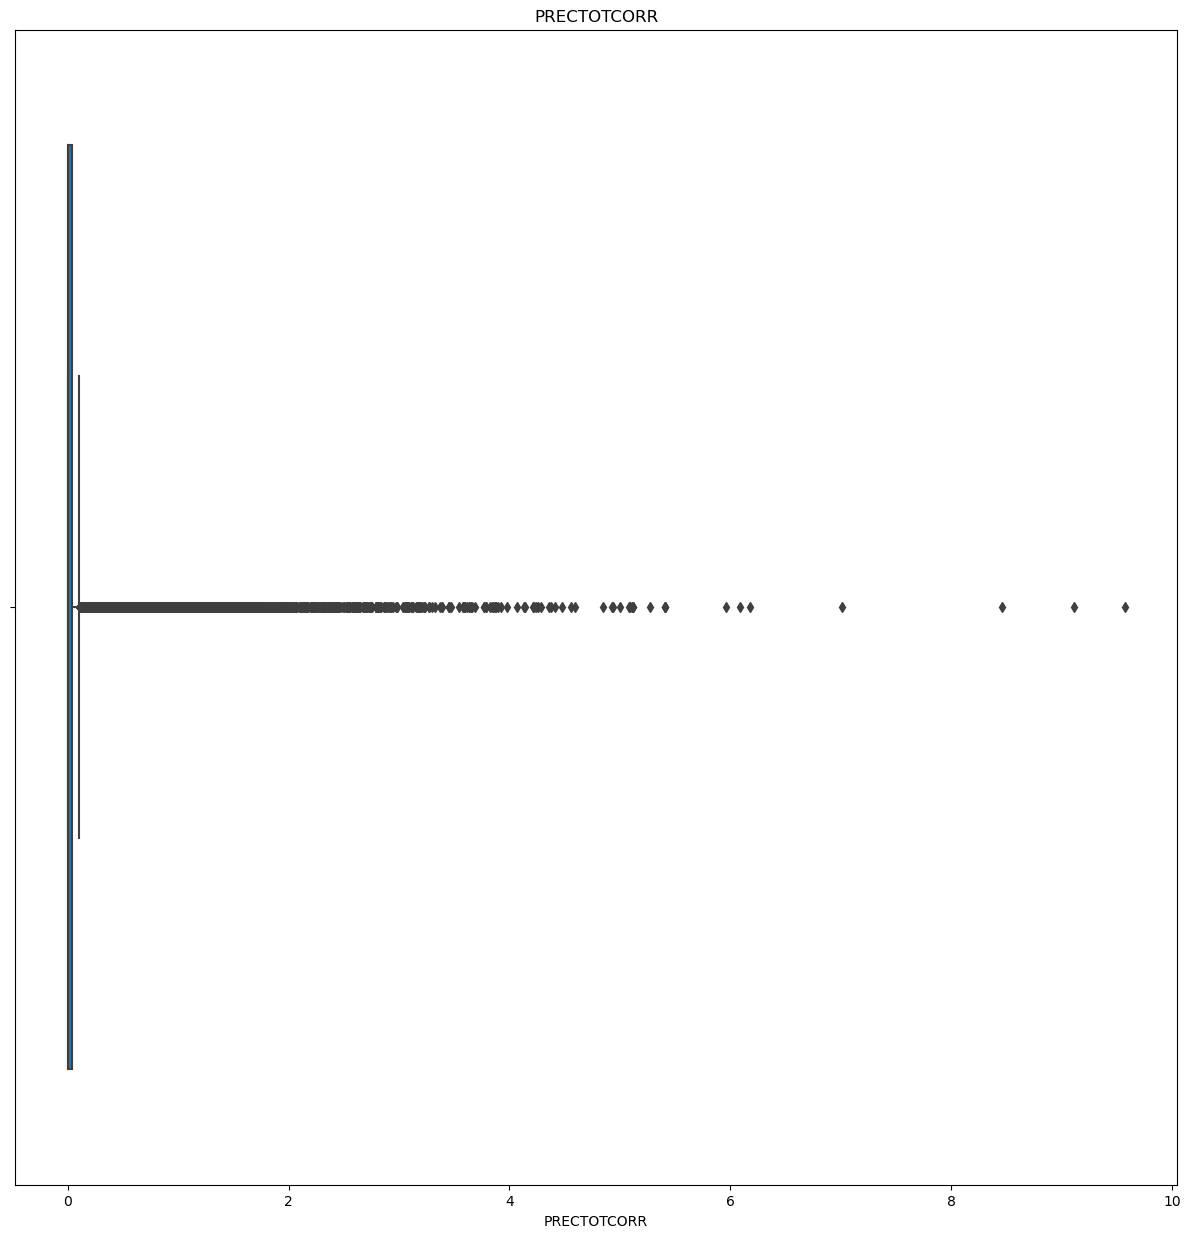

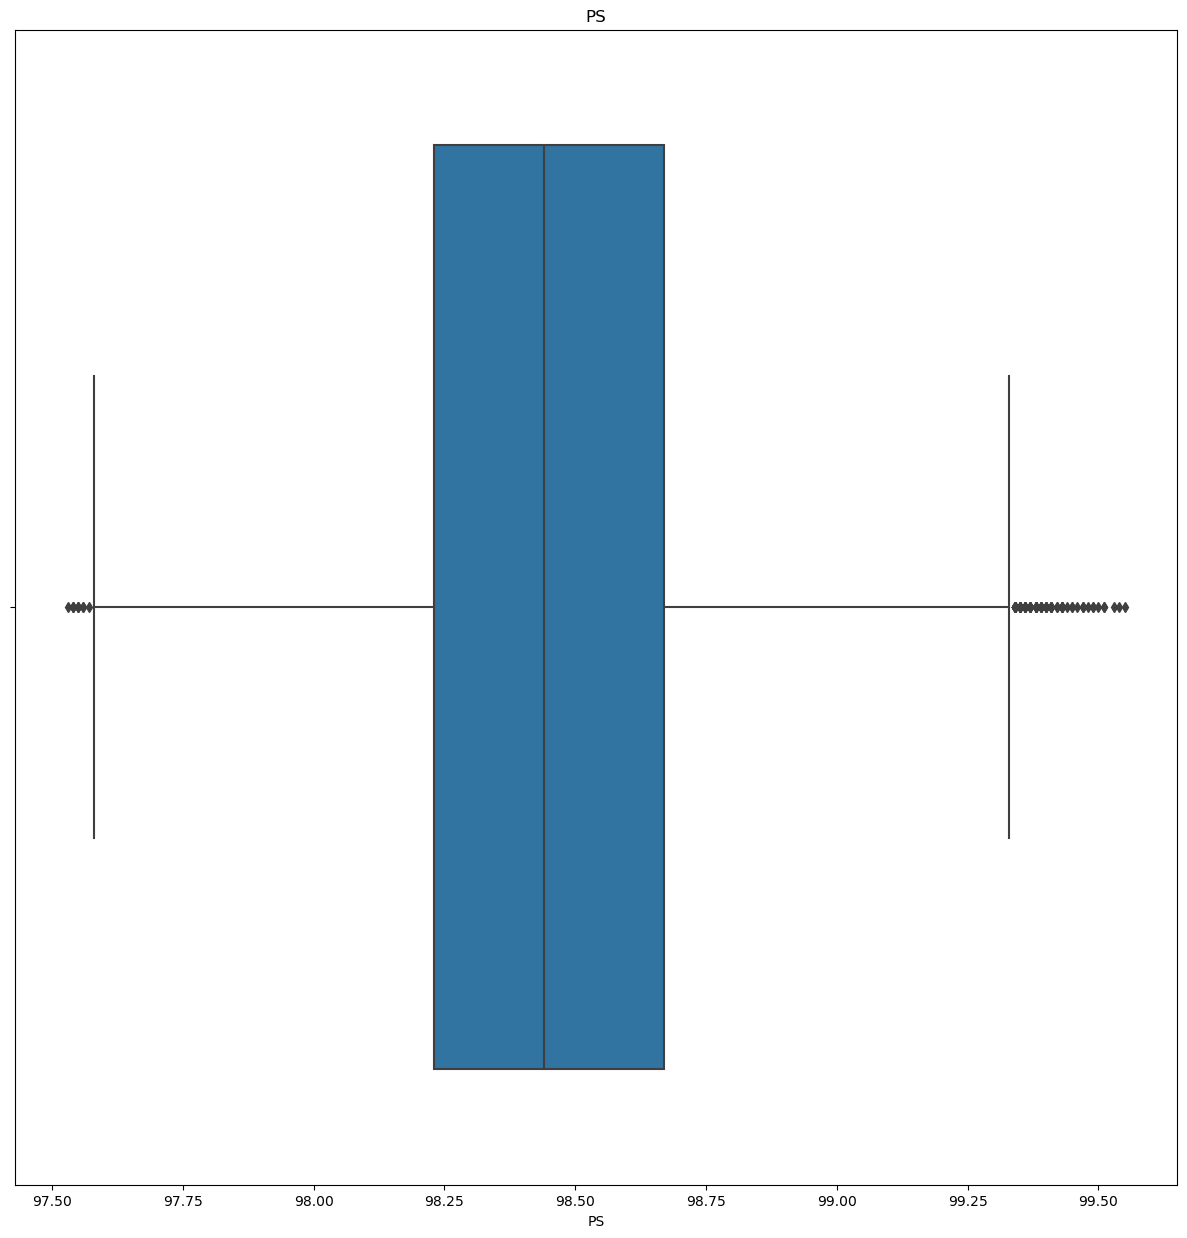

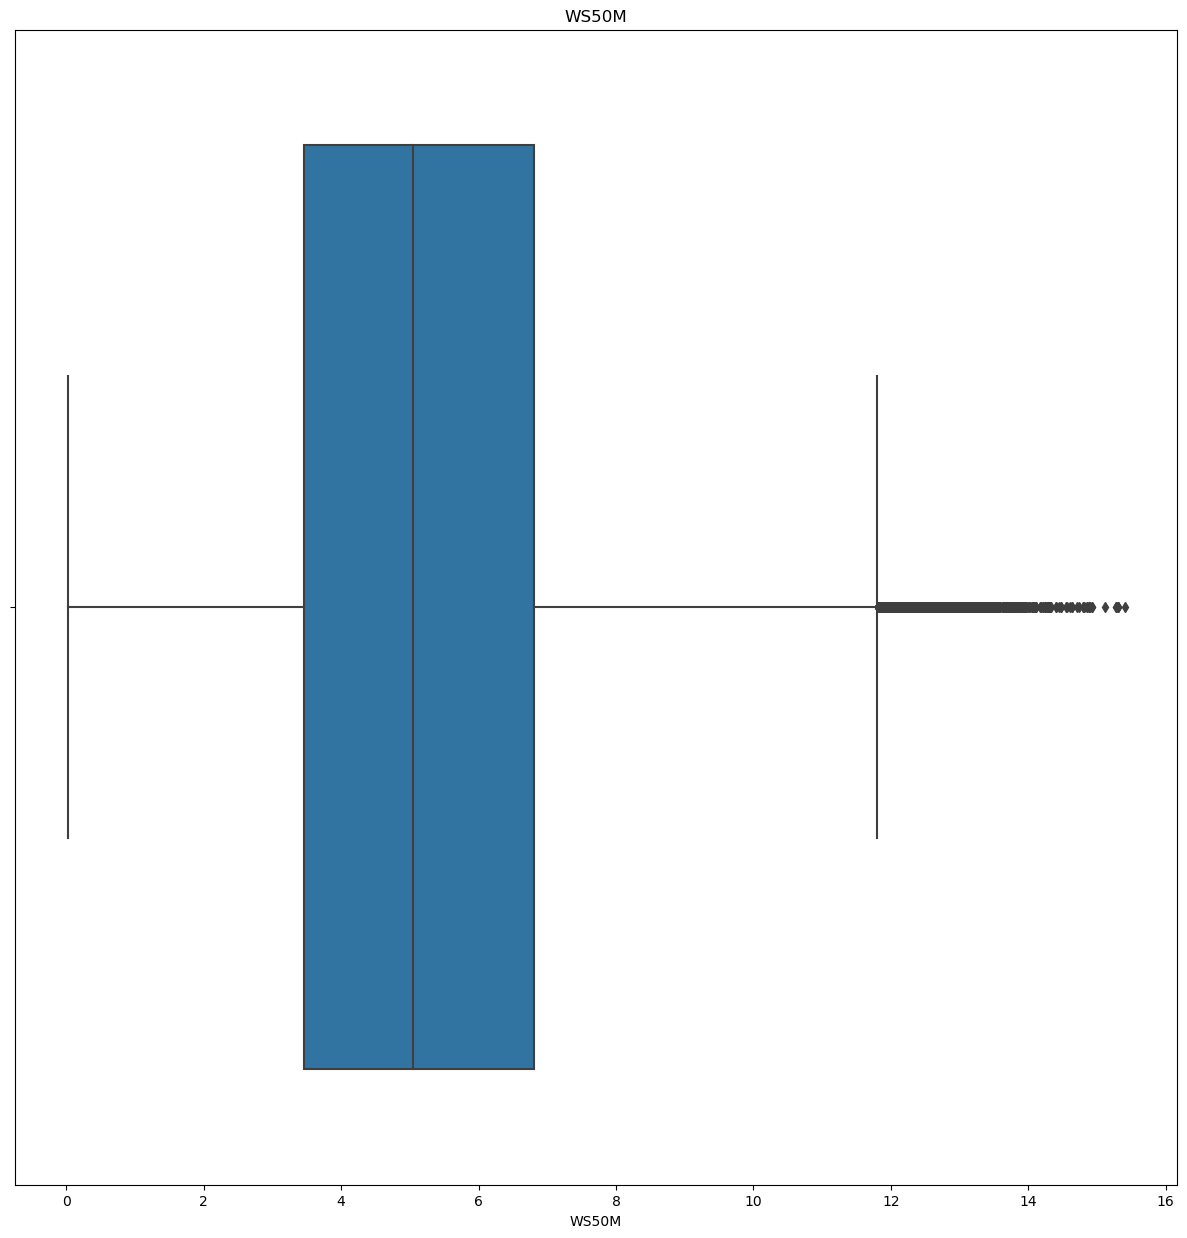

<Figure size 1500x1500 with 0 Axes>

In [11]:
#A for loop is used to plot a boxplot for all the continuous features to see the outliers
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [12]:
d=df.copy()

In [13]:
print(d["T2M"].unique())
print(type(df["T2M"].unique()))
print(d["PRECTOTCORR"].unique())
print(type(df["PRECTOTCORR"].unique()))
# print(d["WS50M_RANGE"].unique())
print(type(d["WS50M"].unique()))


[24.83 25.84 27.45 ... 15.81 14.64 15.78]
<class 'numpy.ndarray'>
[0.   0.1  0.08 0.31 0.48 0.63 0.76 0.79 0.55 0.42 0.3  0.18 0.04 0.01
 0.02 0.03 0.05 0.16 0.2  0.23 0.25 0.21 0.11 0.06 0.34 0.43 0.07 0.09
 0.19 0.15 0.13 0.26 0.28 0.12 0.14 0.4  0.72 0.6  0.56 0.33 0.57 1.11
 1.29 1.09 0.86 0.85 0.9  0.64 0.47 0.49 0.46 0.17 0.54 0.35 0.78 3.15
 5.41 4.22 4.26 1.92 1.04 0.24 0.61 1.15 0.39 0.27 1.08 0.99 0.41 0.29
 0.36 0.32 0.22 0.7  1.05 1.22 1.16 1.21 0.51 0.82 0.91 1.45 1.65 1.72
 1.03 0.53 0.52 1.74 1.07 1.23 1.47 1.54 1.31 0.69 0.38 0.93 1.1  0.96
 0.45 0.59 0.5  0.58 1.12 1.13 1.3  1.84 1.75 0.62 0.8  0.83 0.44 0.71
 0.87 1.02 0.77 0.68 0.74 0.65 0.73 0.97 0.37 1.61 3.19 5.12 6.18 4.85
 3.92 3.33 2.58 2.38 2.02 1.44 1.76 1.52 1.17 0.88 1.64 2.89 3.65 4.21
 3.45 2.29 1.8  1.14 1.35 1.6  1.42 1.51 2.97 2.24 1.59 0.94 0.67 1.49
 1.48 1.24 1.2  1.26 0.66 0.81 1.06 1.34 1.41 0.92 1.98 2.87 3.21 3.04
 2.69 2.13 1.73 1.62 1.25 1.4  0.84 0.75 0.89 1.66 1.33 1.   1.68 1.94
 1.38 1.36 

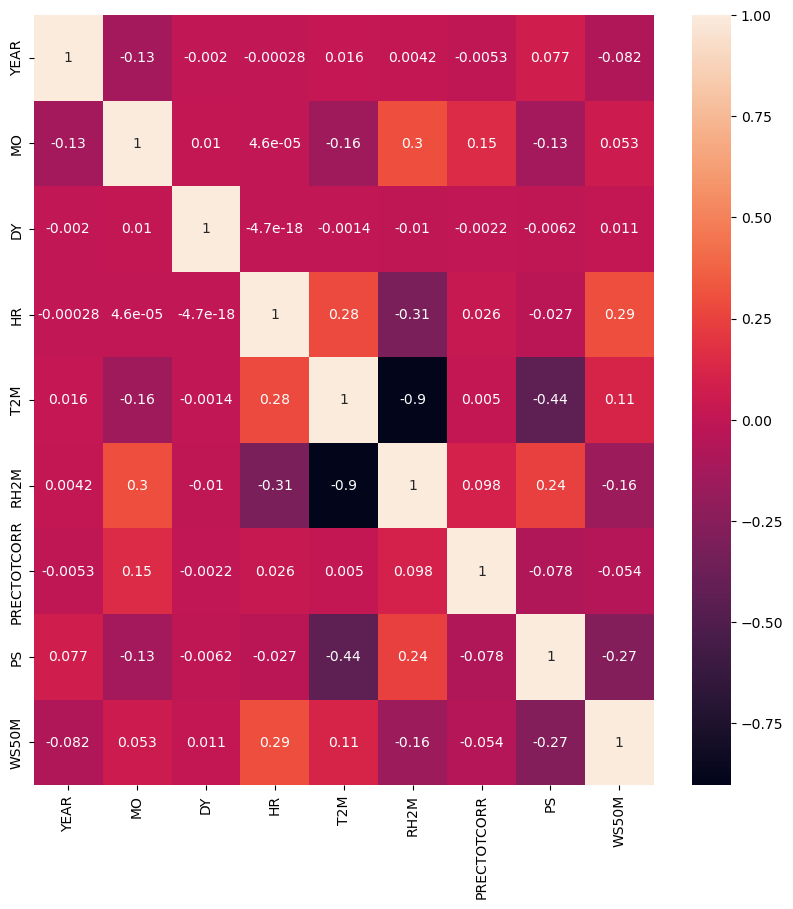

In [14]:
corrmat = d.corr()
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [15]:
def qq_plots(d, variable):
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


T2M


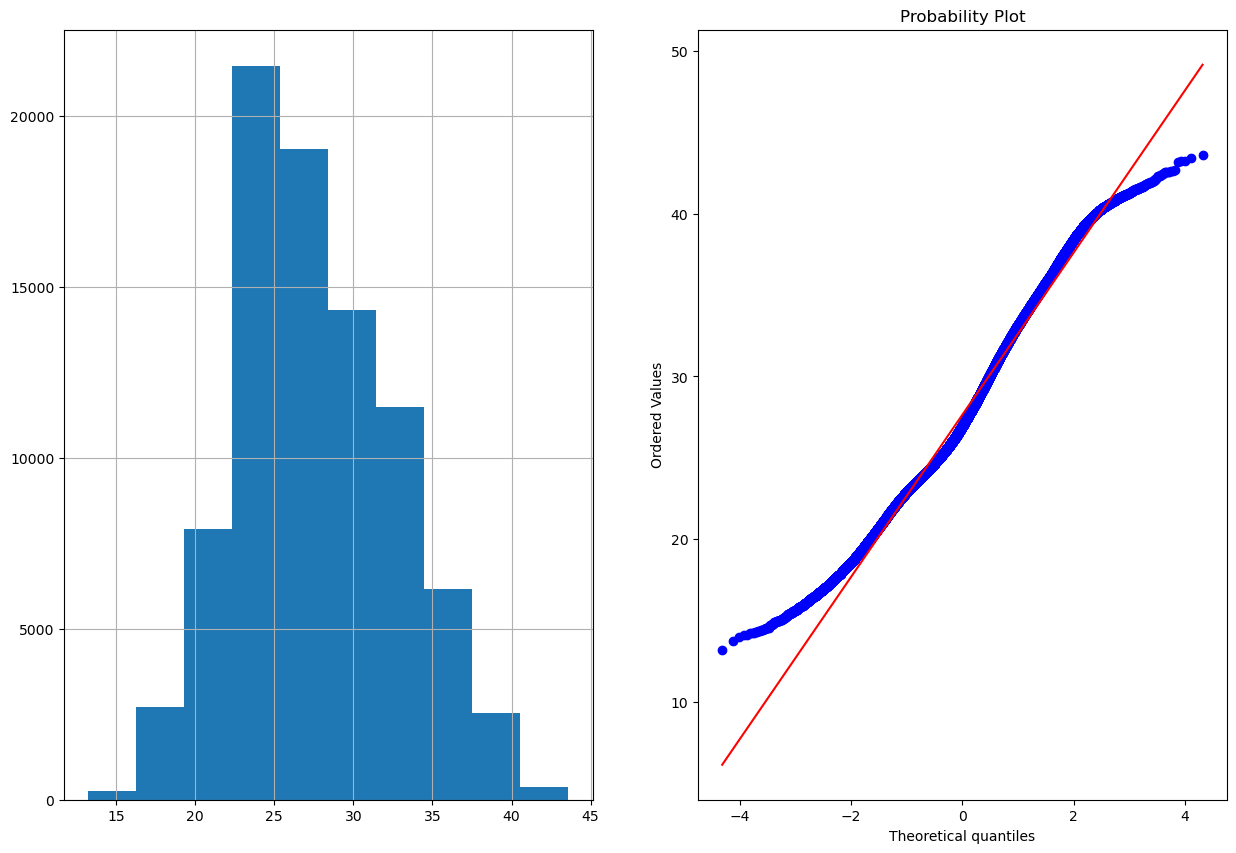

RH2M


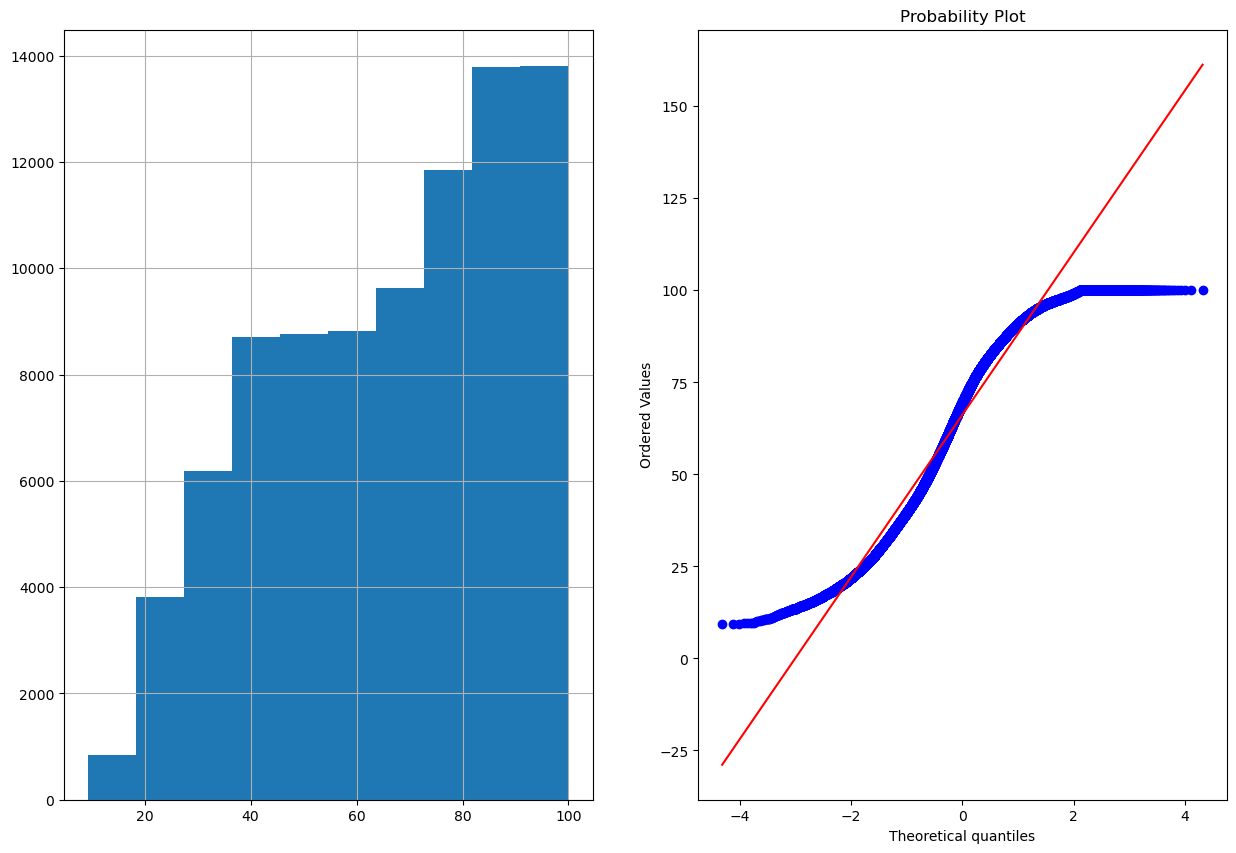

PRECTOTCORR


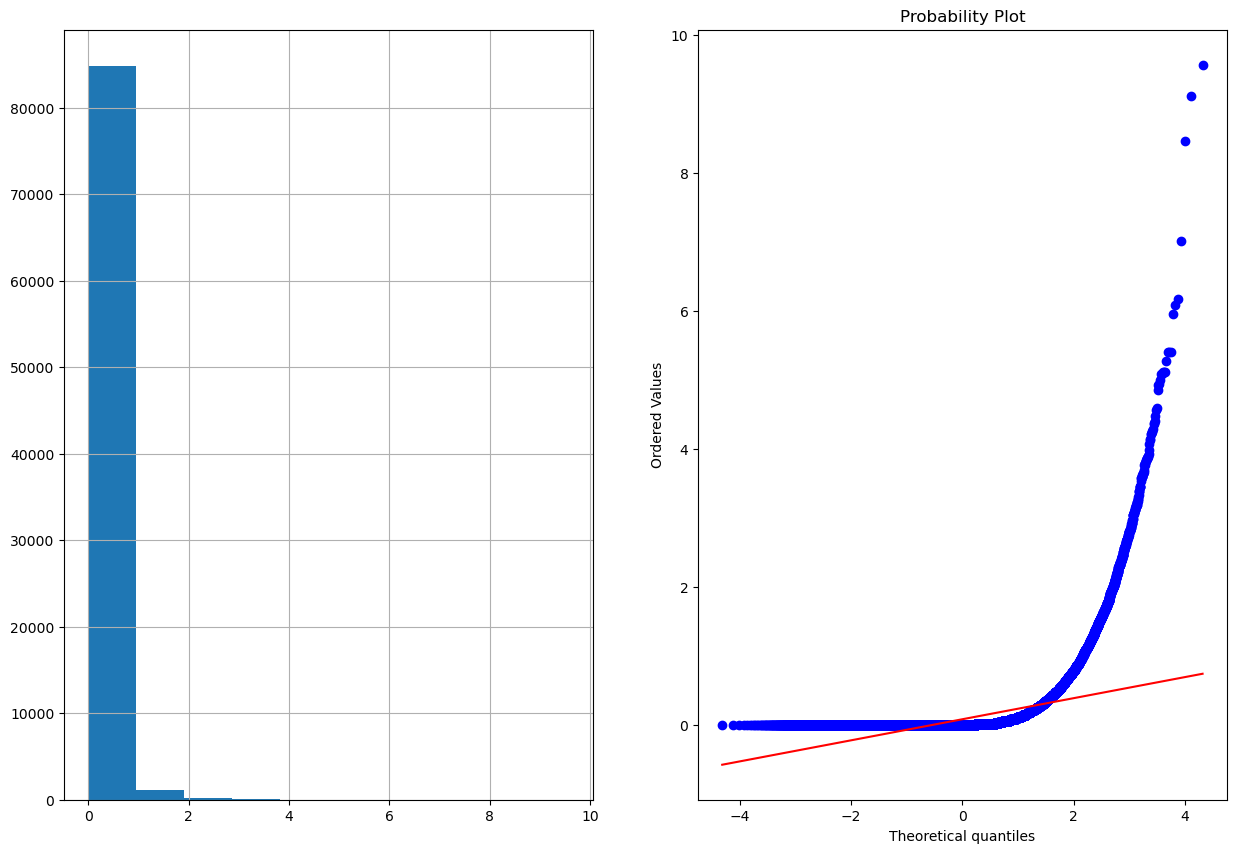

PS


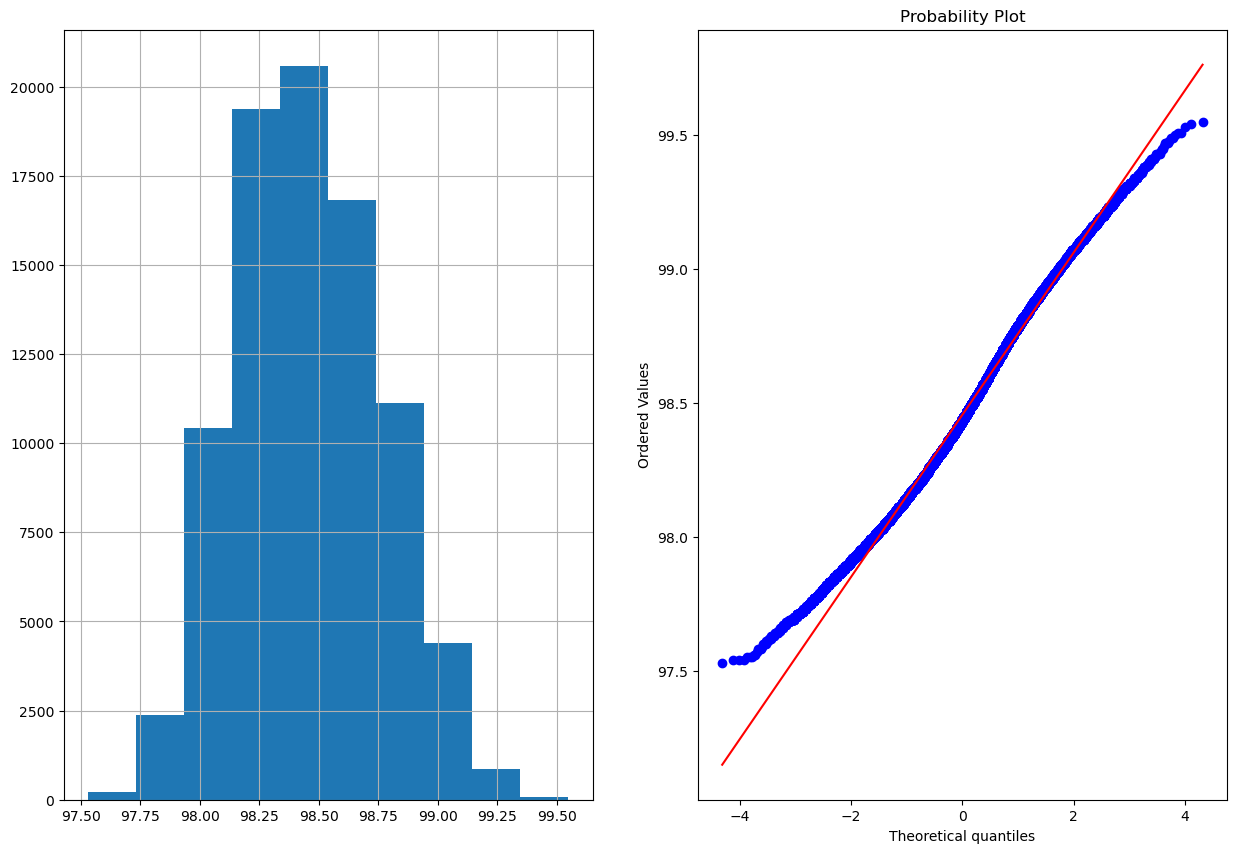

WS50M


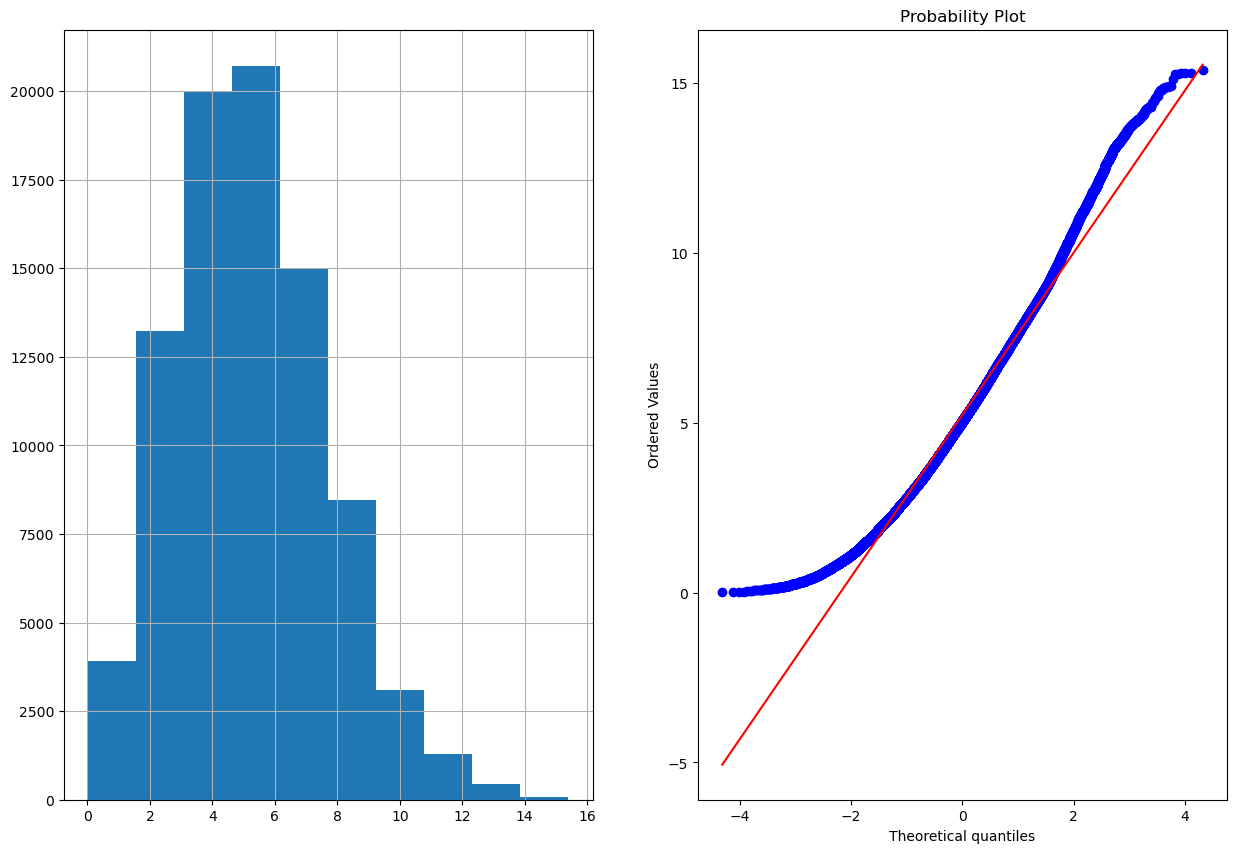

In [16]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15, 10))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()


In [17]:
d.PRECTOTCORR.unique()


array([0.  , 0.1 , 0.08, 0.31, 0.48, 0.63, 0.76, 0.79, 0.55, 0.42, 0.3 ,
       0.18, 0.04, 0.01, 0.02, 0.03, 0.05, 0.16, 0.2 , 0.23, 0.25, 0.21,
       0.11, 0.06, 0.34, 0.43, 0.07, 0.09, 0.19, 0.15, 0.13, 0.26, 0.28,
       0.12, 0.14, 0.4 , 0.72, 0.6 , 0.56, 0.33, 0.57, 1.11, 1.29, 1.09,
       0.86, 0.85, 0.9 , 0.64, 0.47, 0.49, 0.46, 0.17, 0.54, 0.35, 0.78,
       3.15, 5.41, 4.22, 4.26, 1.92, 1.04, 0.24, 0.61, 1.15, 0.39, 0.27,
       1.08, 0.99, 0.41, 0.29, 0.36, 0.32, 0.22, 0.7 , 1.05, 1.22, 1.16,
       1.21, 0.51, 0.82, 0.91, 1.45, 1.65, 1.72, 1.03, 0.53, 0.52, 1.74,
       1.07, 1.23, 1.47, 1.54, 1.31, 0.69, 0.38, 0.93, 1.1 , 0.96, 0.45,
       0.59, 0.5 , 0.58, 1.12, 1.13, 1.3 , 1.84, 1.75, 0.62, 0.8 , 0.83,
       0.44, 0.71, 0.87, 1.02, 0.77, 0.68, 0.74, 0.65, 0.73, 0.97, 0.37,
       1.61, 3.19, 5.12, 6.18, 4.85, 3.92, 3.33, 2.58, 2.38, 2.02, 1.44,
       1.76, 1.52, 1.17, 0.88, 1.64, 2.89, 3.65, 4.21, 3.45, 2.29, 1.8 ,
       1.14, 1.35, 1.6 , 1.42, 1.51, 2.97, 2.24, 1.

In [18]:
d1=d.copy()

In [19]:

d1=d1.PRECTOTCORR.map({0:1})

In [20]:
d2=d1.replace(np.nan, 0)

In [21]:
d2.unique()


array([1., 0.])

In [22]:
d3=d['T2M']

In [23]:
d4 = pd.concat([d3, d2], axis=1, join='inner')
display(d4)


,T2M,PRECTOTCORR
0,24.83,1.0
1,25.84,1.0
2,27.45,0.0
3,29.33,0.0
4,30.95,0.0
...,...,...
86203,28.07,1.0
86204,27.72,1.0
86205,27.37,1.0
86206,27.06,1.0


In [24]:
d5=d['HR'].copy()

In [25]:
d6 = pd.concat([d4, d5], axis=1, join='inner')
display(d6)


,T2M,PRECTOTCORR,HR
0,24.83,1.0,5
1,25.84,1.0,6
2,27.45,0.0,7
3,29.33,0.0,8
4,30.95,0.0,9
...,...,...,...
86203,28.07,1.0,0
86204,27.72,1.0,1
86205,27.37,1.0,2
86206,27.06,1.0,3


In [26]:
d7=d['DY']

In [27]:
d8=d['MO']

In [28]:
d9=d['YEAR']

In [29]:
d10 = pd.concat([d6, d7], axis=1, join='inner')
display(d10)


,T2M,PRECTOTCORR,HR,DY
0,24.83,1.0,5,1
1,25.84,1.0,6,1
2,27.45,0.0,7,1
3,29.33,0.0,8,1
4,30.95,0.0,9,1
...,...,...,...,...
86203,28.07,1.0,0,1
86204,27.72,1.0,1,1
86205,27.37,1.0,2,1
86206,27.06,1.0,3,1


In [30]:
d11 = pd.concat([d10, d8], axis=1, join='inner')
display(d11)


,T2M,PRECTOTCORR,HR,DY,MO
0,24.83,1.0,5,1,6
1,25.84,1.0,6,1,6
2,27.45,0.0,7,1,6
3,29.33,0.0,8,1,6
4,30.95,0.0,9,1,6
...,...,...,...,...,...
86203,28.07,1.0,0,1,4
86204,27.72,1.0,1,1,4
86205,27.37,1.0,2,1,4
86206,27.06,1.0,3,1,4


In [31]:
d12 = pd.concat([d11, d9], axis=1, join='inner')
display(d12)


,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,24.83,1.0,5,1,6,2011
1,25.84,1.0,6,1,6,2011
2,27.45,0.0,7,1,6,2011
3,29.33,0.0,8,1,6,2011
4,30.95,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,28.07,1.0,0,1,4,2021
86204,27.72,1.0,1,1,4,2021
86205,27.37,1.0,2,1,4,2021
86206,27.06,1.0,3,1,4,2021


In [32]:
d12

,T2M,PRECTOTCORR,HR,DY,MO,YEAR
0,24.83,1.0,5,1,6,2011
1,25.84,1.0,6,1,6,2011
2,27.45,0.0,7,1,6,2011
3,29.33,0.0,8,1,6,2011
4,30.95,0.0,9,1,6,2011
...,...,...,...,...,...,...
86203,28.07,1.0,0,1,4,2021
86204,27.72,1.0,1,1,4,2021
86205,27.37,1.0,2,1,4,2021
86206,27.06,1.0,3,1,4,2021


In [33]:
d12['PRECTOTCORR'].unique()

array([1., 0.])

In [34]:
d13=d['RH2M'].copy()

In [35]:
d14=d['WS50M'].copy()

In [36]:
d15 = pd.concat([d12, d13], axis=1, join='inner')
display(d15)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M
0,24.83,1.0,5,1,6,2011,91.44
1,25.84,1.0,6,1,6,2011,86.06
2,27.45,0.0,7,1,6,2011,76.56
3,29.33,0.0,8,1,6,2011,65.25
4,30.95,0.0,9,1,6,2011,56.75
...,...,...,...,...,...,...,...
86203,28.07,1.0,0,1,4,2021,67.56
86204,27.72,1.0,1,1,4,2021,70.88
86205,27.37,1.0,2,1,4,2021,74.31
86206,27.06,1.0,3,1,4,2021,77.06


In [37]:
d16 = pd.concat([d15, d14], axis=1, join='inner')
display(d16)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M
0,24.83,1.0,5,1,6,2011,91.44,5.44
1,25.84,1.0,6,1,6,2011,86.06,4.52
2,27.45,0.0,7,1,6,2011,76.56,5.46
3,29.33,0.0,8,1,6,2011,65.25,6.06
4,30.95,0.0,9,1,6,2011,56.75,6.23
...,...,...,...,...,...,...,...,...
86203,28.07,1.0,0,1,4,2021,67.56,4.03
86204,27.72,1.0,1,1,4,2021,70.88,4.28
86205,27.37,1.0,2,1,4,2021,74.31,4.16
86206,27.06,1.0,3,1,4,2021,77.06,4.08


In [38]:
d17=d['WS50M'].copy()

In [39]:
d18 = pd.concat([d16, d17], axis=1, join='inner')
display(d18)

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,24.83,1.0,5,1,6,2011,91.44,5.44,5.44
1,25.84,1.0,6,1,6,2011,86.06,4.52,4.52
2,27.45,0.0,7,1,6,2011,76.56,5.46,5.46
3,29.33,0.0,8,1,6,2011,65.25,6.06,6.06
4,30.95,0.0,9,1,6,2011,56.75,6.23,6.23
...,...,...,...,...,...,...,...,...,...
86203,28.07,1.0,0,1,4,2021,67.56,4.03,4.03
86204,27.72,1.0,1,1,4,2021,70.88,4.28,4.28
86205,27.37,1.0,2,1,4,2021,74.31,4.16,4.16
86206,27.06,1.0,3,1,4,2021,77.06,4.08,4.08


/home/unknown/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRECTOTCORR', ylabel='count'>

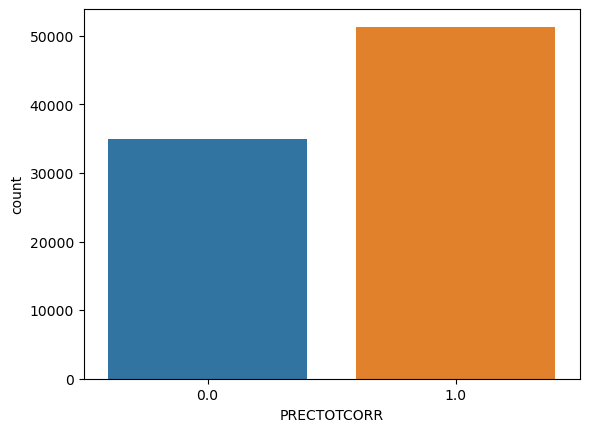

In [40]:
sns.countplot(d18["PRECTOTCORR"])

In [41]:
d18.to_csv("karur-1.csv")

In [42]:
d18

,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M
0,24.83,1.0,5,1,6,2011,91.44,5.44,5.44
1,25.84,1.0,6,1,6,2011,86.06,4.52,4.52
2,27.45,0.0,7,1,6,2011,76.56,5.46,5.46
3,29.33,0.0,8,1,6,2011,65.25,6.06,6.06
4,30.95,0.0,9,1,6,2011,56.75,6.23,6.23
...,...,...,...,...,...,...,...,...,...
86203,28.07,1.0,0,1,4,2021,67.56,4.03,4.03
86204,27.72,1.0,1,1,4,2021,70.88,4.28,4.28
86205,27.37,1.0,2,1,4,2021,74.31,4.16,4.16
86206,27.06,1.0,3,1,4,2021,77.06,4.08,4.08
